## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#read the data
df = pd.read_csv('/content/drive/MyDrive/Airbnb Booking Analysis/Airbnb NYC 2019.csv')

In [5]:
df.shape

(48895, 16)

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#checking the null values in the dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Since the columns like last_review and _reviews_per_month have more number of null values and as they are unnecessary columns, just drop them.
df_new = df.copy()
df_new = df_new.drop(['last_review','reviews_per_month'], axis=1)


In [ ]:
#Fill the missing values
df_new['name'].fillna('missing', inplace = True)
df_new['host_name'].fillna('missing', inplace=True)
df_new.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###**Areas and Hosts**

In [ ]:
#Hosts and neighbourhood groups
hosts_per_neighbourhood_group = df_new.groupby(['neighbourhood_group']).size().reset_index(name='no_of_hosts')
hosts_per_neighbourhood_group

,neighbourhood_group,no_of_hosts
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


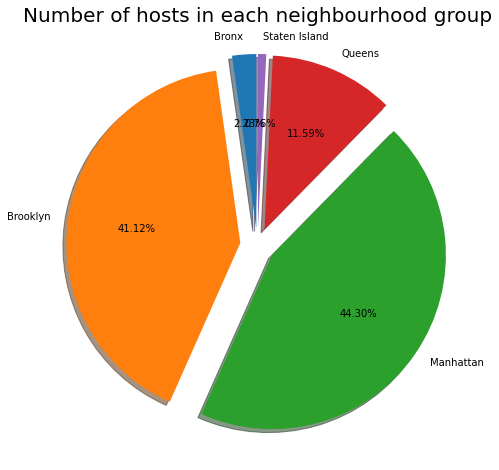

In [ ]:
plt.pie(hosts_per_neighbourhood_group['no_of_hosts'],labels=hosts_per_neighbourhood_group['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )

plt.rcParams['figure.figsize'] = (8,8)
plt.title('Number of hosts in each neighbourhood group', {'fontsize': 20})
plt.show()


**Key Understandings:** Most of the hosts are in Manhattan and Brooklyn

In [ ]:
#Hosts and host listings 
hosts_listings = df_new.groupby(['host_name'])['calculated_host_listings_count'].max().reset_index()
highest_calculated_host_listings_count = hosts_listings.sort_values(['calculated_host_listings_count'], ascending=False).head(10)
highest_calculated_host_listings_count

,host_name,calculated_host_listings_count
9781,Sonder (NYC),327
1356,Blueground,232
5336,Kara,121
5471,Kazuya,103
9780,Sonder,96
4809,Jeremy & Laura,96
2123,Corporate Housing,91
5524,Ken,87
8395,Pranjal,65
7223,Mike,52


Text(0, 0.5, 'Host listings count')

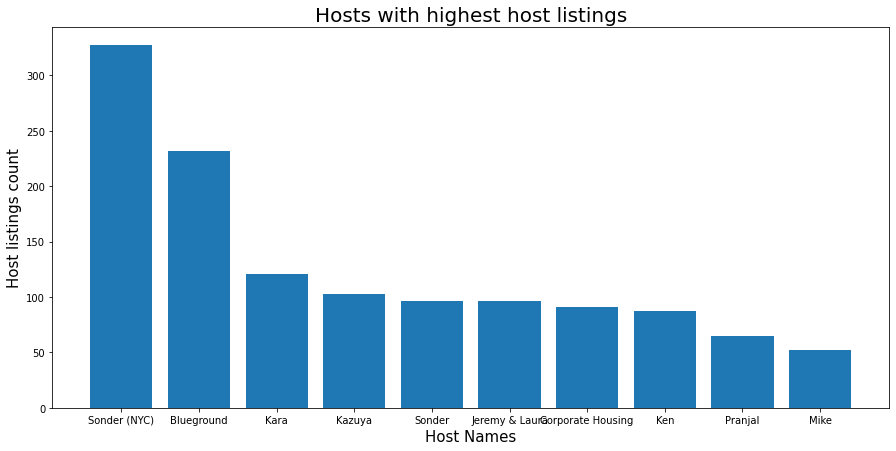

In [ ]:
#Plotting the graph of hosts with highest calculated host listings count
host_name = highest_calculated_host_listings_count['host_name']
calculated_host_listings_count = highest_calculated_host_listings_count['calculated_host_listings_count']
plt.bar(host_name,calculated_host_listings_count)

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Hosts with highest host listings', {'fontsize':20})
plt.xlabel('Host Names',{'fontsize':15})
plt.ylabel('Host listings count',{'fontsize':15})


**Key Understandings:** The host Sonder(NYC) has the highest listings of 327

###**Locations, Prices & Reviews**

In [ ]:
#Reviews and neighbourhood groups
reviews_per_neighbourhood_group = df_new.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values('number_of_reviews')
reviews_per_neighbourhood_group


,neighbourhood_group,number_of_reviews
0,Bronx,321
4,Staten Island,333
1,Brooklyn,488
2,Manhattan,607
3,Queens,629


Text(0, 0.5, 'Number of reviews')

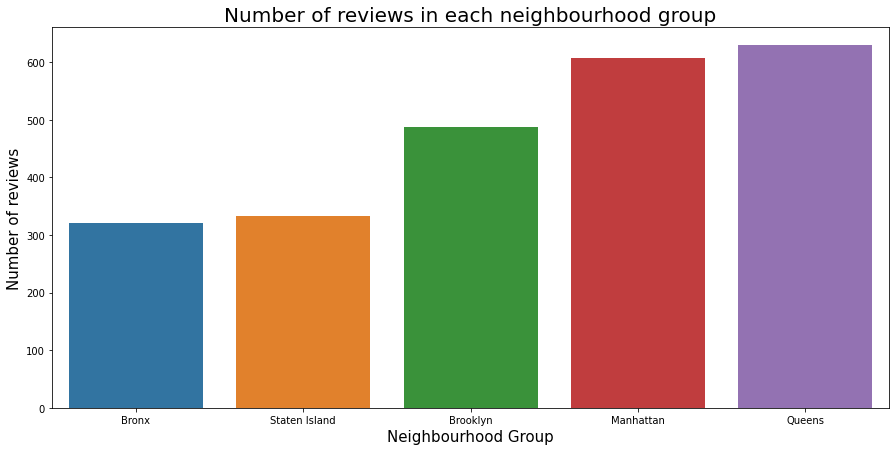

In [ ]:
ax = sns.barplot(x=reviews_per_neighbourhood_group['neighbourhood_group'], y=reviews_per_neighbourhood_group['number_of_reviews'], data=reviews_per_neighbourhood_group)

plt.rcParams['figure.figsize'] = (8,6)
ax.set_title('Number of reviews in each neighbourhood group',{'fontsize':20})
ax.set_xlabel('Neighbourhood Group', {'fontsize':15})
ax.set_ylabel('Number of reviews',{'fontsize':15})

**Key Understandings:**

*   Most of the people likes **Queens** and **Manhattan**
*   From the above 2 graphs (i.e. Number of hosts in each neighbourhood group & Number of reviews in each neighbourhood group), it can be seen that even with moderate number of hosts in Queens, it generated the highest revenue out of all the nieghbourhood group






In [ ]:
#Price and reviews
price_reviews = df_new.groupby(['price'])['number_of_reviews'].max().reset_index()
price_reviews


,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
...,...,...
669,7703,0
670,8000,1
671,8500,2
672,9999,6


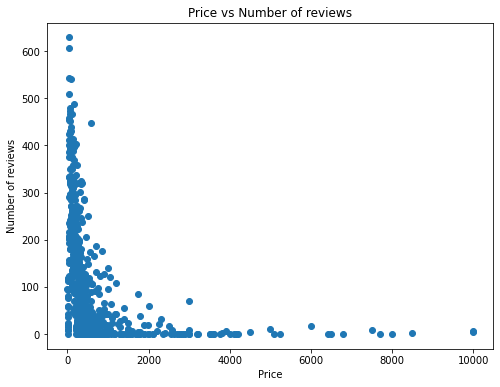

In [ ]:
plt.scatter(price_reviews['price'],price_reviews['number_of_reviews'])

plt.rcParams['figure.figsize'] = (8,6) 
plt.title('Price vs Number of reviews')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.show()

**Key Understandings:** Most of the guests prefer cheaper price

###**Busiest Hosts**

In [ ]:
#Lets consider the host with most reviews
hosts_reviews = df_new.groupby(['host_id','host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values('number_of_reviews',ascending=False).head(10)
hosts_reviews

,host_id,host_name,room_type,neighbourhood_group,number_of_reviews
24546,47621202,Dona,Private room,Queens,629
7721,4734398,Jj,Private room,Manhattan,607
22268,37312959,Maya,Private room,Queens,543
4602,2369681,Carol,Private room,Manhattan,540
19494,26432133,Danielle,Private room,Queens,510
13741,12949460,Asa,Entire home/apt,Brooklyn,488
1978,792159,Wanda,Private room,Brooklyn,480
5068,2680820,Linda,Private room,Queens,474
161,42273,Dani,Entire home/apt,Brooklyn,467
18335,23591164,Angela,Private room,Queens,466


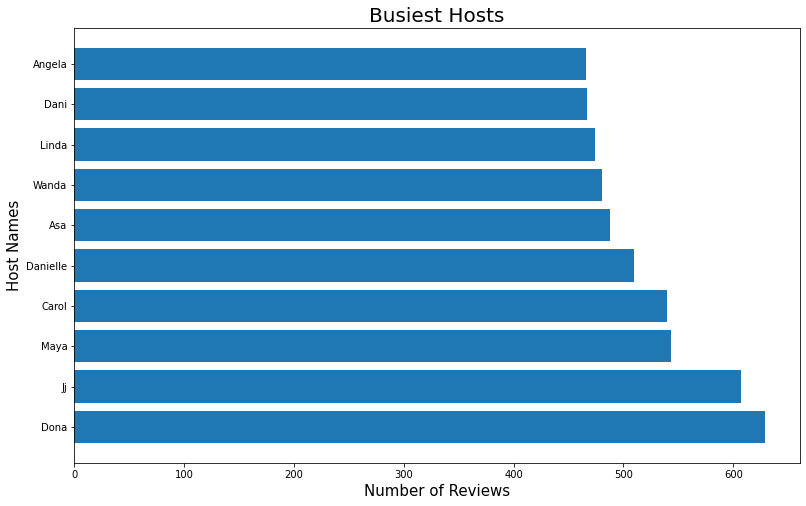

In [ ]:
plt.barh(hosts_reviews['host_name'],hosts_reviews['number_of_reviews'])

plt.rcParams['figure.figsize'] = (13,8)
plt.title('Busiest Hosts', {'fontsize':20})
plt.xlabel('Number of Reviews',{'fontsize':15})
plt.ylabel('Host Names',{'fontsize':15})

plt.show()

**Room Types**

In [ ]:
room_type_reviews = df_new.groupby('room_type')['number_of_reviews'].count().reset_index()
room_type_reviews

,room_type,number_of_reviews
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


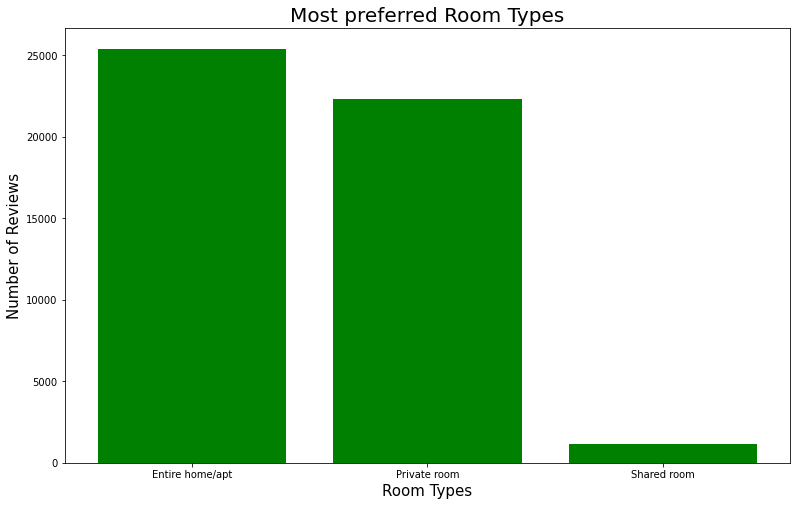

In [ ]:
plt.bar(room_type_reviews['room_type'],room_type_reviews['number_of_reviews'], color='green')

plt.rcParams['figure.figsize'] = (10,5)
plt.title('Most preferred Room Types', {'fontsize':20})
plt.xlabel('Room Types',{'fontsize':15})
plt.ylabel('Number of Reviews',{'fontsize':15})
plt.show()

**Key Understandings:**

*   From above 2 graphs, we could clearly see that **entire home/apt** and **private room** are the most preferred room types.

*   Also **Dona** and **Ji** are the busiest hosts.





###**Difference of Traffic among different Areas**

*   From the above graph "Number of reviews in each Neighbourhood group", it is clearly seen that Queens, Manhattan and Brooklyn accomodated most number of guests.
*   Almost 90% people prefer Entire home/apt or Private room
*   Also more than 80% of the hosts are in Manhattan and Brooklyn.
*   Guests prefer cheap priced rooms







#**Conclusion**

*   80% of the hosts are in **Manhattan** and Brooklyn
*   **Sonder(NYC)** and **Blueground** has most number of host listings
*   Most of the people likes **Queens** and **Manhattan**
*   Even with moderate number of hosts in **Queens**, it generated the highest 
revenue out of all the nieghbourhood group
*   Most of the guests prefer **cheaper price**
*   **Dona** and **Ji** are the busiest hosts
*   About 90% of the guests prefer **entire home/apt** or **private room** room types.
